In [1]:
import os
import numpy as np
import pandas as pd
import torch
import logging
import random
import pkg_resources
import sklearn
import csv   
from chem_negative_sampling import gen_neg_smiles
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./rcns_with_label.csv')

In [3]:
df2 = pd.read_csv('./train_with_label.csv')

In [4]:
df1 = df#[['rxn_type']]

In [5]:
len(df1['rxn_type'].tolist())

4206

In [5]:
df.shape


(4206, 2)

In [17]:
# neg_smiles_list = []
# for i in range(len(df1)):
#     smiles = df1.at[i, 'smiles']
#     #products = smiles.split('>>')[1]
#     #neg_smiles = gen_neg_smiles(smiles)
#     neg_smiles += products
#     if neg_smiles is not None:
#         neg_smiles_list.append(neg_smiles)

[14:11:29] Explicit valence for atom # 18 N, 5, is greater than permitted
[14:11:29] Explicit valence for atom # 18 N, 5, is greater than permitted
[14:11:29] Explicit valence for atom # 18 N, 4, is greater than permitted
[14:11:29] Explicit valence for atom # 18 N, 4, is greater than permitted
[14:11:29] Explicit valence for atom # 7 N, 4, is greater than permitted
[14:11:29] Explicit valence for atom # 18 N, 4, is greater than permitted
[14:11:29] Explicit valence for atom # 18 N, 4, is greater than permitted
[14:11:29] Explicit valence for atom # 18 N, 4, is greater than permitted
[14:11:29] Explicit valence for atom # 18 N, 4, is greater than permitted
[14:11:29] Explicit valence for atom # 18 N, 4, is greater than permitted
[14:11:29] Explicit valence for atom # 18 N, 4, is greater than permitted
[14:11:29] Explicit valence for atom # 18 N, 4, is greater than permitted
[14:11:29] Explicit valence for atom # 18 N, 4, is greater than permitted
[14:11:29] Explicit valence for atom # 

TypeError: unsupported operand type(s) for +=: 'NoneType' and 'str'

In [18]:
train_model_path =  '/afs/crc.nd.edu/user/x/xhuang2/rxnfp/rxnfp/models/transformers/bert_class_1k_tpl'
model = SmilesClassificationModel("bert", train_model_path, use_cuda=torch.cuda.is_available())

NameError: name 'SmilesClassificationModel' is not defined

In [5]:
df1['smiles'][0].split('>>')[1]

'[OH:1][c:2]1[n:3][cH:4][c:5]([C:6](=[O:7])[CH2:15][CH:16]([CH3:17])[CH3:18])[cH:12][cH:13]1'

In [21]:
df1.groupby('rxn_type').get_group(672).reset_index()

,index,smiles,rxn_type
0,0,[CH2:15]([CH:16]([CH3:17])[CH3:18])[Mg+:19].[C...,672
1,2,[F:19][c:20]1[cH:21][cH:22][c:23]([CH2:24][NH:...,672
2,3,[C:1]([CH3:2])(=[O:3])[c:4]1[cH:5][cH:6][c:7](...,672
3,4,[Br:27][N:28][C:33]([CH2:32][CH2:31][C:29]=[O:...,672
4,5,[BH4-:13].[C:1]([CH3:2])(=[O:3])[NH:4][c:5]1[c...,672
...,...,...,...
680,995,[CH2:2]([c:3]1[cH:4][cH:5][cH:6][cH:7][cH:8]1)...,672
681,996,[CH2:14]([N:15]=[C:19]=[O:20])[CH2:16][CH2:17]...,672
682,997,[CH3:18][CH2:19][OH:20].[N+:1]([O-:2])[c:4]1[c...,672
683,998,[CH3:26][OH:27].[ClH:30].[NH2:1][c:2]1[cH:3][c...,672


In [6]:
items = []
groups = []
for item, group in df1.groupby('rxn_type'):
    items.append(item)
    groups.append(len(group))
print(items, groups)

[28, 76, 80, 84, 92, 103, 112, 151, 172, 175, 182, 239, 242, 246, 253, 259, 266, 274, 282, 324, 344, 345, 363, 373, 374, 387, 410, 418, 419, 436, 445, 447, 452, 481, 490, 491, 504, 512, 513, 533, 535, 560, 576, 586, 590, 591, 617, 618, 619, 624, 641, 655, 672, 677, 703, 716, 717, 751, 762, 771, 772, 784, 806, 813, 838, 891, 949, 961] [8, 1, 24, 11, 79, 23, 52, 76, 11, 3, 2, 47, 1, 1, 1, 86, 10, 144, 2, 71, 1, 28, 1, 39, 2, 1, 1, 6, 46, 4, 3, 70, 1, 6, 3, 1, 62, 30, 51, 50, 2, 9, 2, 147, 4, 2, 4, 1, 3, 1, 18, 7, 2871, 1, 2, 1, 5, 1, 2, 1, 3, 30, 21, 2, 1, 1, 2, 3]


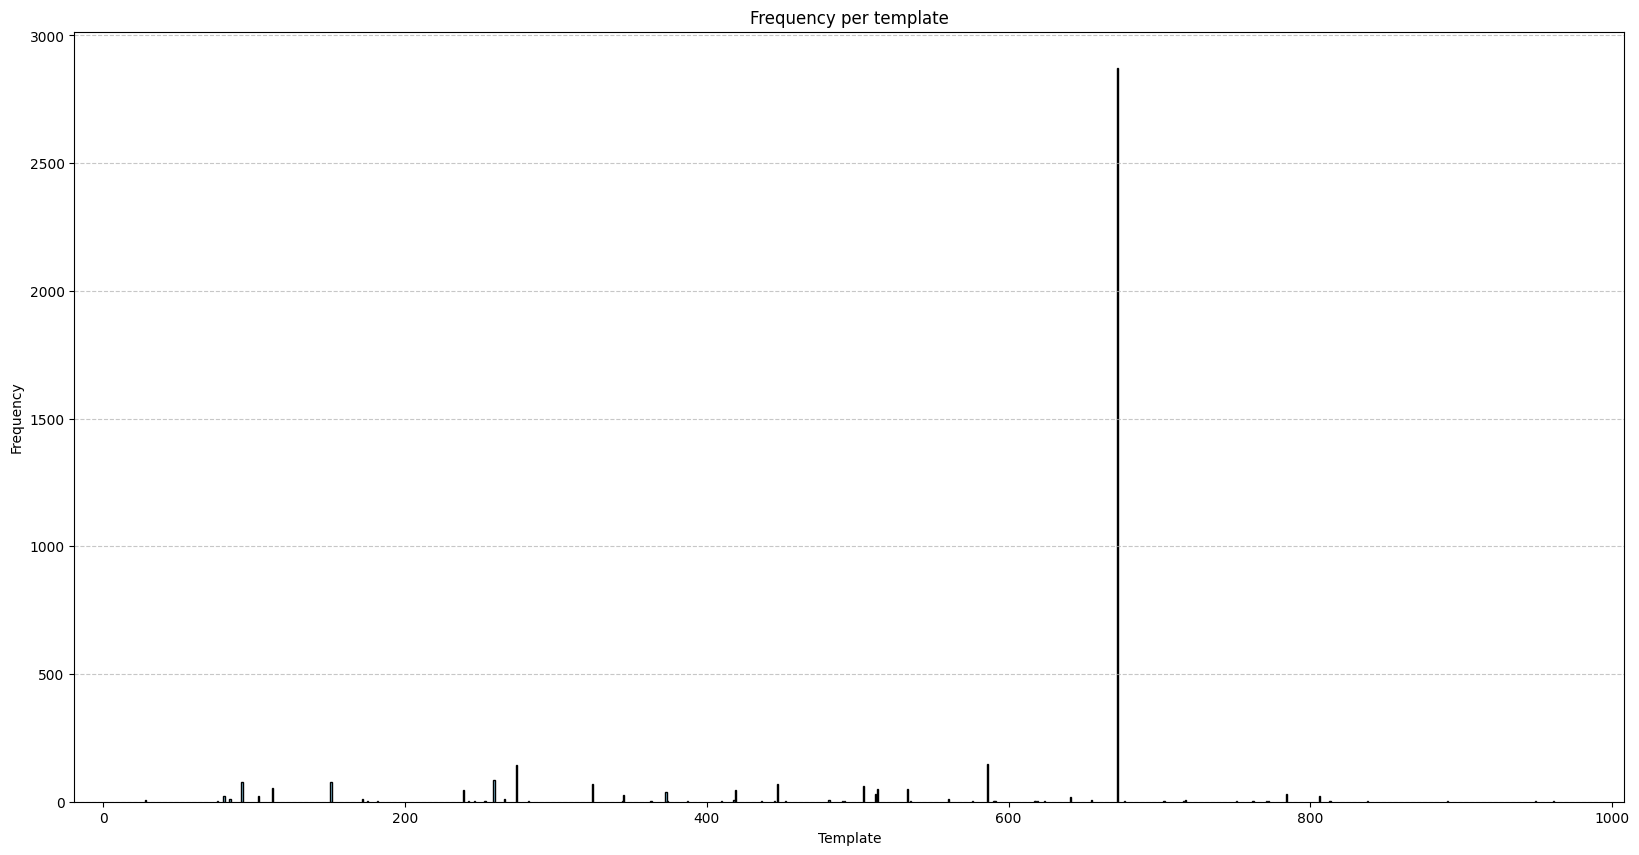

In [7]:
plt.figure(figsize=(20, 10))
plt.bar(items, groups, color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel('Template')
plt.ylabel('Frequency')
plt.title('Frequency per template')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

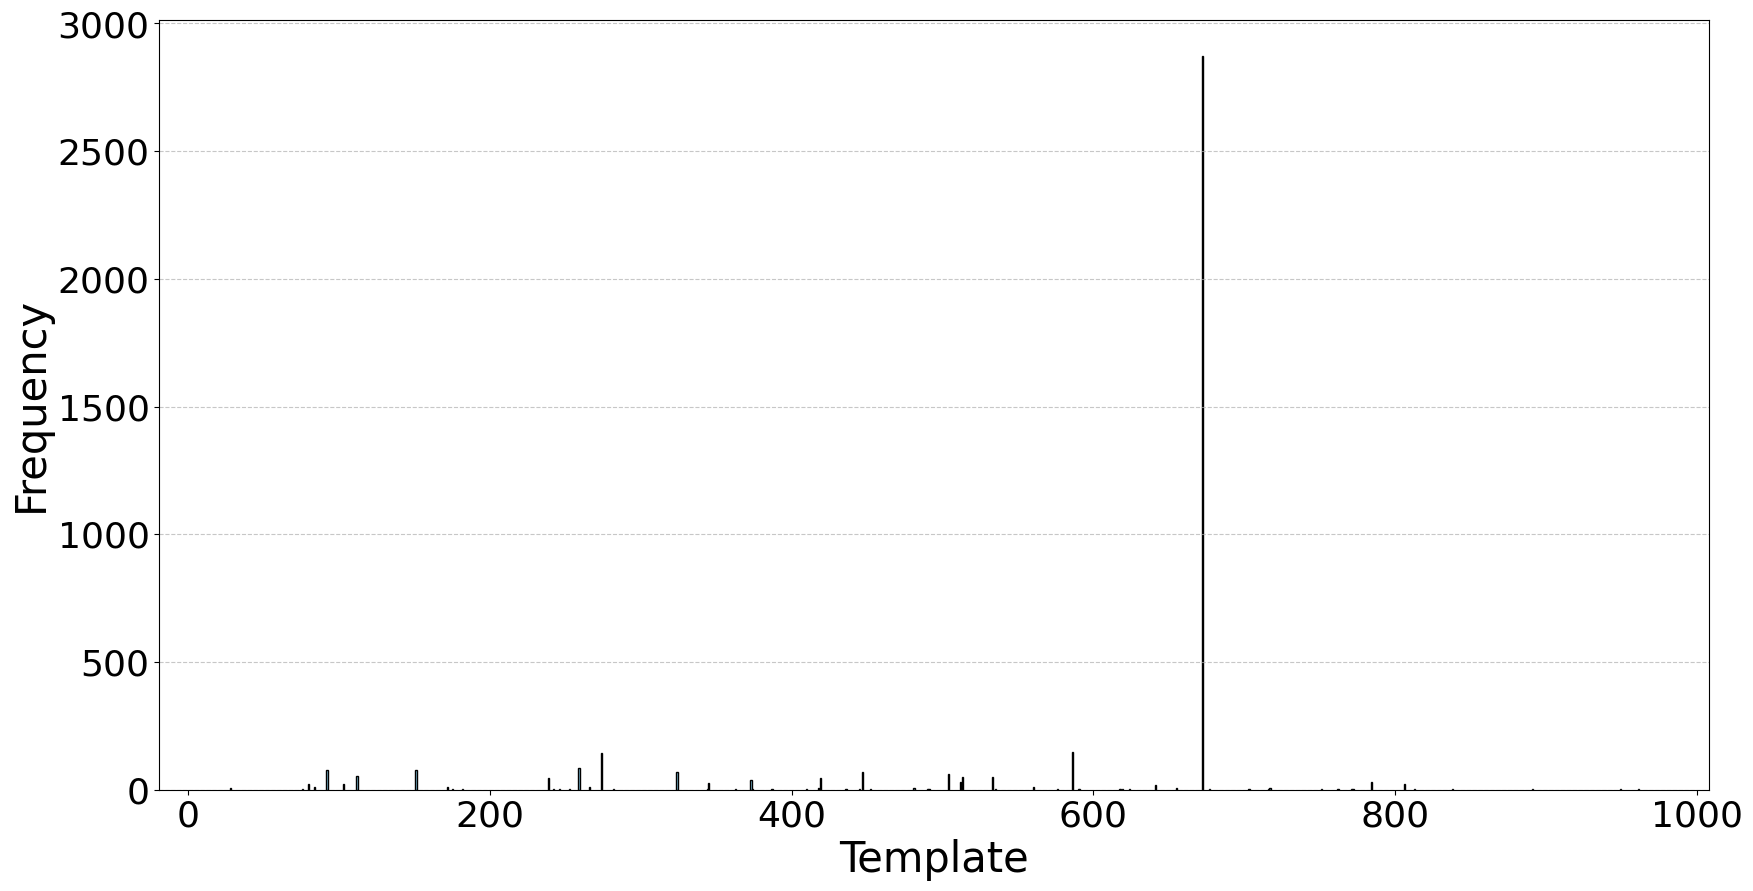

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar(items, groups, color='skyblue', edgecolor='black')

# Customize the plot with enlarged fonts
plt.xlabel('Template', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
#plt.title('Frequency per template', fontsize=24)
plt.xticks(rotation=0, fontsize=26)
plt.yticks(fontsize=26)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('./RCNS_distri.pdf' ,format='pdf', dpi=300)
# Show the plot
plt.show()


In [18]:
items1 = []
groups1 = []
for item, group in df2[:10000].groupby('rxn_type'):
    items1.append(item)
    groups1.append(len(group))
print(items1, groups1)

[28, 65, 76, 80, 84, 92, 103, 112, 151, 172, 175, 176, 177, 182, 239, 242, 246, 253, 259, 266, 274, 282, 324, 345, 363, 373, 374, 387, 390, 400, 418, 419, 436, 442, 445, 447, 452, 456, 481, 490, 491, 504, 512, 513, 533, 535, 560, 562, 576, 586, 590, 591, 617, 618, 619, 624, 632, 641, 650, 655, 672, 677, 703, 716, 717, 751, 762, 771, 772, 784, 806, 813, 830, 838, 891, 932, 949, 961, 963, 964, 976] [12, 3, 3, 36, 17, 218, 51, 164, 181, 26, 8, 1, 2, 3, 80, 1, 1, 1, 233, 23, 295, 6, 132, 58, 2, 76, 10, 2, 2, 1, 12, 128, 7, 1, 4, 132, 8, 1, 14, 8, 3, 174, 52, 120, 135, 10, 32, 1, 4, 394, 14, 6, 7, 2, 9, 2, 1, 41, 1, 17, 6823, 1, 4, 1, 19, 2, 2, 4, 7, 74, 54, 4, 1, 3, 1, 1, 5, 3, 1, 1, 1]


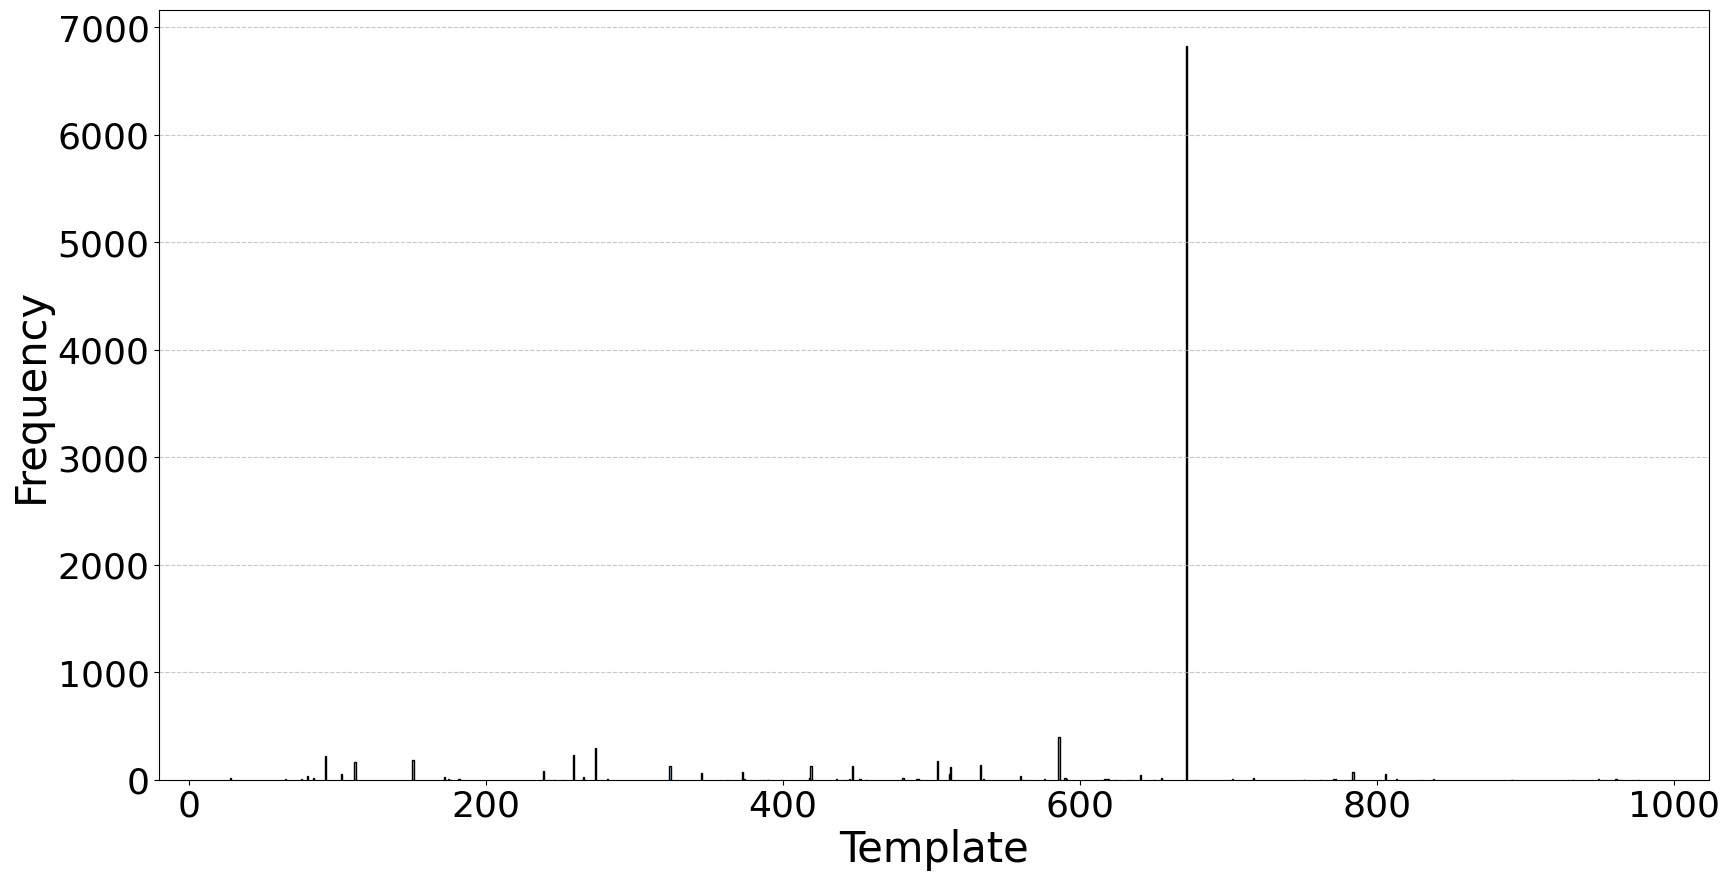

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar(items1, groups1, color='skyblue', edgecolor='black')

# Customize the plot with enlarged fonts
plt.xlabel('Template', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
#plt.title('Frequency per template', fontsize=24)
plt.xticks(rotation=0, fontsize=26)
plt.yticks(fontsize=26)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('./class_distri.pdf' ,format='pdf', dpi=300)
# Show the plot
plt.show()

/tmp/1694668.1.gpu/ipykernel_2060749/2944813823.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items, y=groups, palette='Blues_d', edgecolor='black')


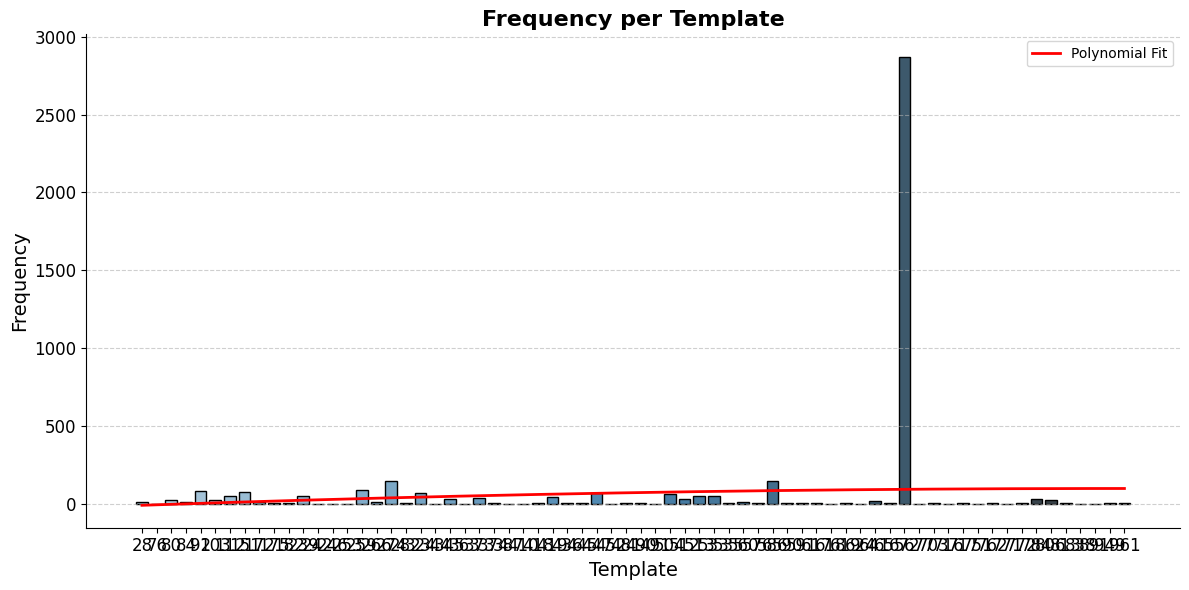

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data (replace with your actual `items` and `groups`)
# items = ['A', 'B', 'C', 'D', 'E']
# groups = [10, 15, 7, 12, 9]

# Convert categorical x-axis to numeric for regression
x = np.arange(len(items))
y = groups

plt.figure(figsize=(12, 6))  # Adjusted for paper size

# Bar plot
sns.barplot(x=items, y=groups, palette='Blues_d', edgecolor='black')

# Regression line (2nd-degree polynomial for better curve fit if needed)
coeffs = np.polyfit(x, y, deg=2)
poly_eqn = np.poly1d(coeffs)
x_smooth = np.linspace(x.min(), x.max(), 200)
y_smooth = poly_eqn(x_smooth)
plt.plot(x_smooth, y_smooth, color='red', linewidth=2, label='Polynomial Fit')

# Aesthetic improvements
plt.xlabel('Template', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency per Template', fontsize=16, weight='bold')
plt.xticks(ticks=x, labels=items, rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
sns.despine()

# Use serif font (recommended for papers)
plt.rcParams["font.family"] = "serif"

plt.tight_layout()
plt.show()
